Regressão linear simples usando Gradient Descent. Conversão do primeiro exercício da primeira semana do curso para Python.

Primeira parte: lendo o arquivo 'ex1data1.txt', com os dados a serem utilizados na análise. Criação da matriz $X$ e do vetor $y$.

In [33]:
import csv
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [230]:
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,6)

In [231]:
def computeCost(X, y, theta):
    m = len(y)
    J = ( 1 / (2*m) ) * sum( ( np.matmul(X, theta) - y )**2 )
    return J

In [252]:
def gradientDescent(X, y, theta, alpha, iterations):
    
    m = len(y)
    J_history = []
    
    theta_track_0 = [theta[0]]
    theta_track_1 = [theta[1]]
    
    for iter in range(iterations):
        
        theta_0 = theta[0] - (alpha/m) * sum( (np.matmul(X, theta) - y) * X[:,0] )
        theta_1 = theta[1] - (alpha/m) * sum( (np.matmul(X, theta) - y) * X[:,1] )
        
        theta_track_0.append(theta_0)
        theta_track_1.append(theta_1)
        
        theta = np.array([theta_0, theta_1])
        
        J_history.append(computeCost(X,y,theta))
    
    return theta, J_history, theta_track_0, theta_track_1

In [233]:
X = []
y = []
with open('ex1data1.txt', encoding = 'utf8') as f:
    for line in f:
        line = line.rstrip("\n")
        line_divided = line.split(',')
        X.append(float(line_divided[0]))
        y.append(float(line_divided[1]))

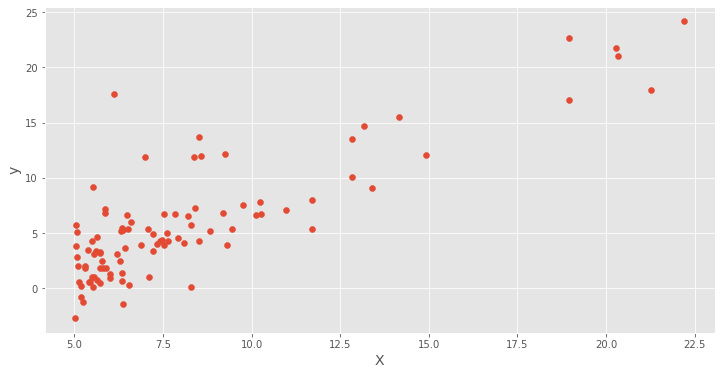

In [234]:
figura = plt.figure()
plt.scatter(X, y)
plt.xlabel("X", fontsize = 14)
plt.ylabel("y", fontsize = 14)
plt.show()
figura.savefig("Regressao.pdf")

In [235]:
a = np.ones(len(X))
X = np.array(X)

# Adding column to numpy array
X = np.column_stack((a, X))

In [247]:
iterations = 3500
alpha      = 0.01

In [248]:
theta = np.zeros(2)
J = computeCost(X, y, theta)
print(J)

32.072733877455654


In [256]:
theta = np.array([-1,2])
J = computeCost(X, y, theta)
print(J)

54.24245508201238


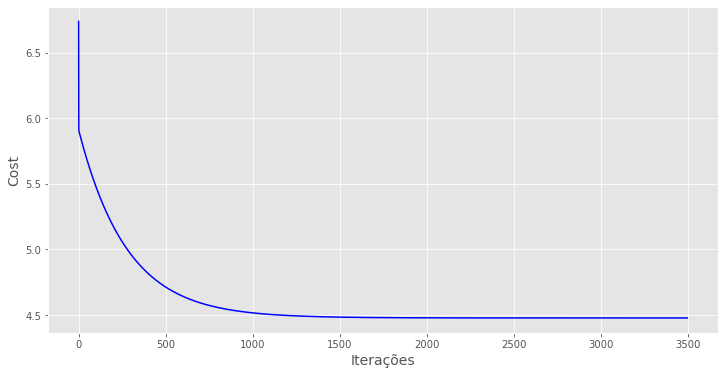

In [271]:
theta = np.zeros(2)
theta, J_history, theta_track_0, theta_track_1 = gradientDescent(X, y, theta, alpha, iterations)
figura = plt.figure()
plt.plot(J_history,color="blue")
plt.xlabel("Iterações", fontsize = 14)
plt.ylabel("Cost", fontsize = 14)
plt.show()
figura.savefig("Evolution_cost.pdf")

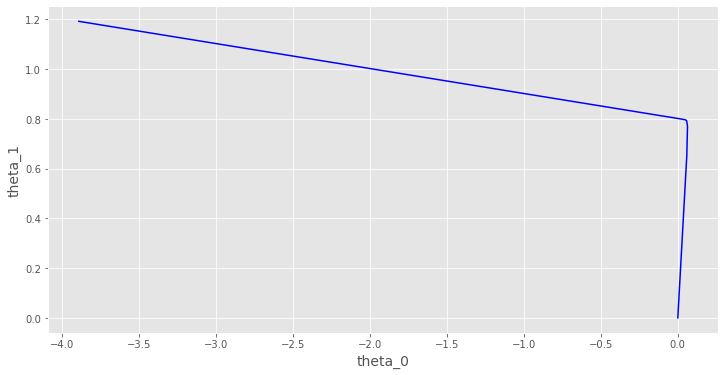

In [272]:
# print(theta_track_0)
# print(theta_track_1)
figura = plt.figure()
plt.plot(theta_track_0, theta_track_1,color="blue")
plt.xlabel("theta_0", fontsize = 14)
plt.ylabel("theta_1", fontsize = 14)
plt.show()
figura.savefig("Regressao")

In [251]:
theta = np.array([5,5])
theta = gradientDescent(X, y, theta, alpha, iterations)
print(theta)

[-3.88053105  1.19150163]


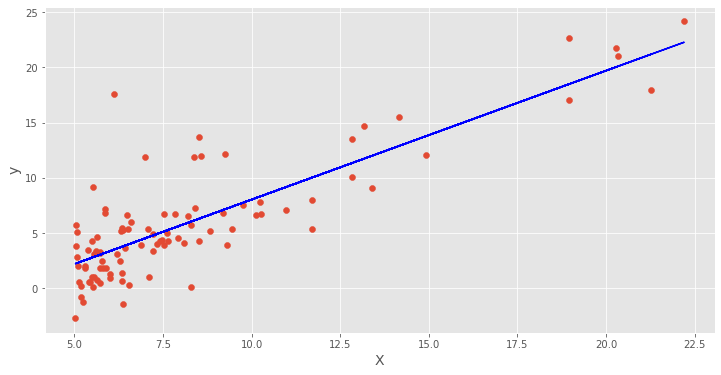

In [241]:
figura = plt.figure()
plt.scatter(X[:,1], y)
plt.plot(X[:,1], np.matmul(X,theta),color="blue")
plt.xlabel("X", fontsize = 14)
plt.ylabel("y", fontsize = 14)
plt.show()
figura.savefig("Regressao")

In [242]:
theta0_vals = np.arange(-10, 10, 0.2).tolist()
theta1_vals = np.arange(-1, 4, 0.05).tolist()
X1, Y1 = np.meshgrid(theta0_vals, theta1_vals)

In [243]:
Z1 = []
for i in range(len(theta1_vals)):
    for j in range(len(theta0_vals)):
        t = np.array([ theta0_vals[i], theta1_vals[j] ])
        Z1.append( computeCost(X, y, t) )      
Z1 = np.array(Z1)
Z1 = Z1.reshape(X1.shape)  

[323.31311854 312.07993184 301.050255   290.22408801 279.60143088
 269.18228361 258.9666462  248.95451864 239.14590094 229.54079309
 220.13919511 210.94110698 201.94652871 193.15546029 184.56790173
 176.18385303 168.00331419 160.0262852  152.25276607 144.6827568
 137.31625738 130.15326782 123.19378812 116.43781828 109.88535829
 103.53640816  97.39096789  91.44903747  85.71061691  80.17570621
  74.84430536  69.71641437  64.79203324  60.07116197  55.55380055
  51.23994899  47.12960729  43.22277544  39.51945345  36.01964132
  32.72333905  29.63054663  26.74126407  24.05549137  21.57322852
  19.29447553  17.2192324   15.34749912  13.6792757   12.21456214
  10.95335844   9.89566459   9.0414806    8.39080647   7.94364219
   7.69998777   7.65984321   7.82320851   8.19008366   8.76046867
   9.53436354  10.51176826  11.69268284  13.07710728  14.66504157
  16.45648572  18.45143973  20.6499036   23.05187732  25.6573609
  28.46635434  31.47885763  34.69487078  38.11439379  41.73742666
  45.5639693

Text(0.5, 1.0, 'Simplest default with labels')

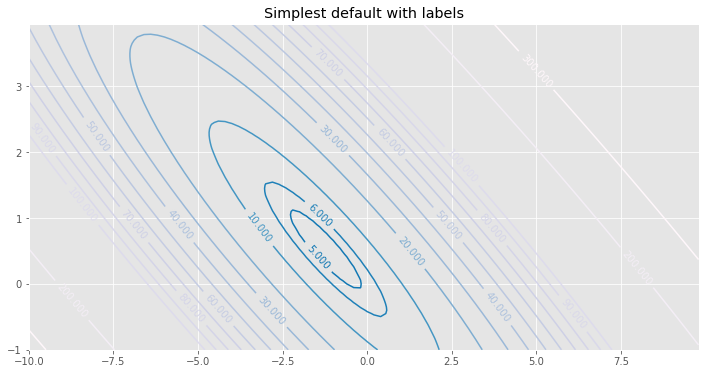

In [244]:
from matplotlib import ticker, cm
fig, ax = plt.subplots()
levels = np.array([1,2,3,4,5,6,10,20,30,40,50,60,70,80,90,100,200,300])
CS = ax.contour(X1, Y1, Z1, levels = levels, locator=ticker.LogLocator(), cmap=cm.PuBu_r)
ax.clabel(CS, inline=True, fontsize=10)
ax.set_title('Simplest default with labels')

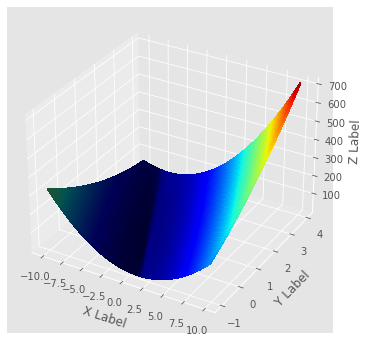

In [245]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

my_col = cm.jet(Z1/np.amax(Z1))

ax.plot_surface(X1, Y1, Z1, rstride=1, cstride=1, facecolors = my_col,
        linewidth=1, antialiased=False)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [ ]:
import numpy as np
from matplotlib import pyplot
import mpl_toolkits.axes_grid1 as ag

x = np.array(...)
y = np.array(...)
z = np.array(...)

levels = np.array([0.,0.00005,0.0001,0.0002,0.00033,0.00076,0.001,0.003])

fig = pyplot.figure(num=1,figsize=(12, 8),dpi=300,facecolor='w',edgecolor='k')
ax = fig.add_subplot(111, aspect="equal")

pltcf = ax.contourf(x, y, z, levels=levels,  cmap="gnuplot2_r", extend="both", origin='lower')
pltct = ax.contour(x, y, z, levels, colors='k', linewidths=0.5, origin='lower')
divider = ag.make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
fig.colorbar(pltcf, cax=cax, orientation='vertical', format='%.1g')
fig.show()